# Preliminary

## Maximum Flow Problem

### Definition
Given:
- A directed graph $ G(V, E) $,
- A source node $s$,
- A sink node $t$,
- Intermediate nodes $ V \setminus \{s, t\} $,
- Each edge $ (u, v) \in E $ has a capacity $ c(u, v) \geq 0 $.

### Constraints

1. **Capacity Constraint**:
   The flow on any edge cannot exceed the capacity of that edge.
   $$0 \leq f(u, v) \leq c(u, v), \quad \forall (u, v) \in E$$
   

2. **Flow Conservation**:
   The total incoming flow at any intermediate node must equal the total outgoing flow.
   $$\sum_{w \in V} f(w, u) = \sum_{w \in V} f(u, w), \quad \forall u \in V \setminus \{s, t\}
   $$
   

3. **Residual Capacity for Forward Edges**:
   Forward flow can occur only if there is residual capacity along the edge.
   $$f(u, v) < c(u, v) \implies \text{flow can increase along } (u, v)$$

4. **Residual Capacity for Backward Edges**:
   Backward flow (reducing flow along an edge) is possible only if there is existing flow to cancel.
   $$f(u, v) > 0 \implies \text{flow can decrease along } (u, v)$$


### Objective
The goal is to maximize the total flow:
$$\text{Maximize } F = \sum_{(s, v) \in E} f(s, v)$$
which is the total flow out of the source $s$, or equivalently, into the sink $ t$:

$$F = \sum_{(v, t) \in E} f(v, t)$$


## Ford- Fulkerson Algorithm 

### Terminology 
1. **Residual Graph**: The graph which indicates adtional possible floe from source to sink. i.e posibility to add more flow
2. **Minimal cut** for any augumented path fro source to sink, minimal cut is the minimum remaining capacity of edges in that path
3. **Augumenting Path** A path from source to sink, it can consist of 
    1. Non full forward edge i.e $f(u, v) < c(u, v)$, here flow can be increased. we can think of this as flow moving in the direction of edge 
    2. Non empty backward edge i.e $f(u, v)  > 0$, here flow can be decreased. we can think of this as flow moving in the opposite direction of edge. 
### Example
See the example below

<img src="figures/flow example.jpg" alt="Flow Example" width="500">

Source is $A$ sink is $F$, 

Example of an augmented path consisting on foward edges only 
$A \implies C \implies D \implies E \implies F$
the residual (remaining) capacity of each edge is $ 11, 9, 8, 10 $

Here the minimal cut of he augumenting path is $8$

so lets increase the flow of the augumenting path by $8$ (in blue)

<img src="figures/flow example 1.jpg" alt="Flow Example 1" width="500">


Example of an augmented path consisting of foward edges and backward edges is  
$A \implies B \implies E \implies D \implies F$
the residual (remaining) capacity of each edge is $ 15, 9, 8, 11 $
here all edges are forward except $E \implies D$ which is backward and the residual capacity here is equal to current flow of edge . 

So the minimal cut is $8$  lets increase the flow once again 

<img src="figures/flow example 2.jpg" alt="Flow Example 2" width="500">

Note for forward edges flow is added and for backward edges flow is subtracted. and in both cases the flow is conserved



### Algorithm 
1. Start with intial flow as o for each of the edges
2. while there exits an Augumenting path from source to sink.
    1. Find augumenting path (use BFS or DFS)
    2. Find minimal cut (residual capacity) along the edges of the path
    3. Increase the flow along the path 

lets solve the an example from start to end to find the maximum flow

S. no|Augumenting Paths | Minimal Cut
--|---|---
1 | $S \to A \to D \to T$ | 8
2 | $S \to C \to D \to T$ | 2
3 | $S \to C \to D \to B \to T$ | 6
4 | $ S \to A \to B \to T$ | 2
5 | $ S \to C \to D \to A \to B  \to T$ | 1

the solution is here 

<img src="figures/flow solved.jpg" alt="Flow Example" width="800">



The maximum flow is $19$


# Definition
Given a graph $G(V,E)$ and number of verticies $h \geq 2$

**Edge Desity :** $\tau (G) = \frac{|E|}{|V|}$
**Clique Instance :** set of h verticies , $S \in V$, is a h-clique instance if each pair of $v,u \in S$ is connected with an edge. 

subgraph of h verticies is fully connected

**clique density :**  $\rho(G \psi ) = \frac{\mu(G , \psi)}{|V|}$

where, $\mu(G,\psi)$ is number of clique instances in graph $G$

**clique degree :** $deg_{G}(v) = $ number of clique instances containing v   

# Problem Statement 

Given a graph $G(V,E)$ and h-clique $ \Psi (V_{\Psi}, E_{\Psi})$ return the subgraph $D$ whose h-clique density $p(D,\Psi)$ is highest 

# Example 

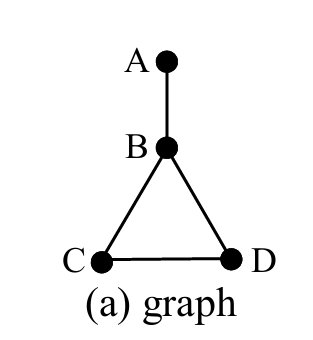


let h be 3 
then 3 -clique $\Psi$ will be $ \{B,C,D\}$

$d(A,\Psi) = 0$

$d(B,\Psi) = 1$

$d(C,\Psi) = 1$

$d(D,\Psi) = 1$

$p(G,\Psi) = 1/4$



# Exact Algorithm 

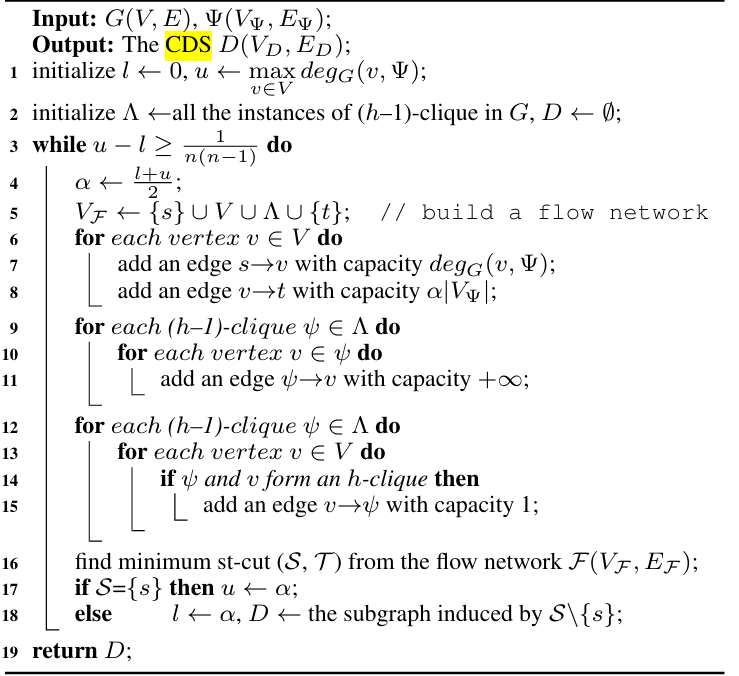

We use lower bound of density equal to zero and upper bound equal to max clique density. Then do the binary search to find the subgrah with highest clique density. Lets go through the example to see how to works 

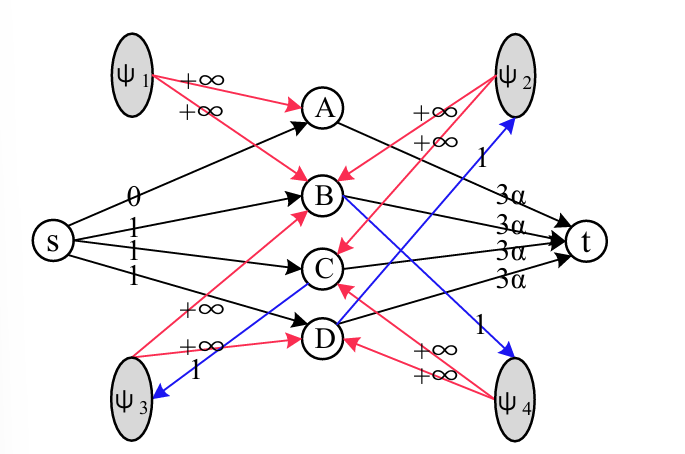

1. $l=0, u = 1$
2.  $h - 1$ cliques are 

    $\Psi_{1} = (A,B)$

    $\Psi_{2} = (B,C)$

    $\Psi_{3} = (B,D)$

    $\Psi_{4} = (C,D)$

3. iter 1 $ l - u = 1  is > 1/(4*3) $
    1. $\alpha = 1/2$
    2. Flow netwrok $V_f = \{s, A,B,C,D,\Psi_1, \Psi_2, \Psi_3, \Psi_4, t \}$
    3. add edges $\{ (s,A),(s,B),(s,C),(s,D),\}$ with capacity equal to $\{0,1,1,1\}$ also add edges $\{(A,t),(B,t),(C,t),(D,t),\}$ with capacity $ 1/2 \times 3 = 3/2$
    4. add edges from $h-1$ clique to their corresponding verticies i.e $\{ (\Psi_1,A),(\Psi_1,B), (\Psi_2,B),(\Psi_2,C),(\Psi_3,B),(\Psi_3,D),(\Psi_4,C),(\Psi_4,D)\}$ with capacity $\infty$
    5. for $h-1$ clique if adding a vertex will form a h clique add edge $\{ (D,\Psi_2),(C,\Psi_3),(B,\Psi_4)\}$ with capacity 1
    6.  maximum flow = 3

        $S = \{ s \}$ as no vertex is reachable from $s$. 

        $ T = \{ t, A,B,C,D, \Psi_1, \Psi_2 , \Psi_3 , \Psi_4 \} $
    
    7. $ u = \alpha = 3/2$ 

    iter 2 $ l - u = 1/2$  is $> 1/(4*3) $
    1. $\alpha = 1/4$
    2. Flow netwrok $V_f = \{s, A,B,C,D,\Psi_1, \Psi_2, \Psi_3, \Psi_4, t \}$
    3. add edges $\{ (s,A),(s,B),(s,C),(s,D),\}$ with capacity equal to $\{0,1,1,1\}$ also add edges $\{(A,t),(B,t),(C,t),(D,t),\}$ with capacity $ 1/4 \times 3 = 3/4$
    4. add edges from $h-1$ clique to their corresponding verticies i.e $\{ (\Psi_1,A),(\Psi_1,B), (\Psi_2,B),(\Psi_2,C),(\Psi_3,B),(\Psi_3,D),(\Psi_4,C),(\Psi_4,D)\}$ with capacity $\infty$
    5. for $h-1$ clique if adding a vertex will form a h clique add edge $\{ (D,\Psi_2),(C,\Psi_3),(B,\Psi_4)\}$ with capacity 1
    6.  maximum flow = 3

        $S = \{ s \}$ as no vertex is reachable from $s$. 

        $ T = \{ t, A,B,C,D, \Psi_1, \Psi_2 , \Psi_3 , \Psi_4 \} $
    
    7. $ u = \alpha = 3/2$ 
    8. create flow netwrok in same way
    9. maximum flow is $9/4$
    
        $S = \{ s, B,C,D \}$ as no vertex is reachable from $s$. 

        $ T = \{ t, A, \Psi_1, \Psi_2 , \Psi_3 , \Psi_4 \} $

    10. $D = \{ B,C,D \}$


        


<img src="figures/after flow.png" alt="Flow Example" width="800">

<img src="figures/afterflow2.png" alt="Flow Example 2" width="800">


# $(k, \Psi )$ Core

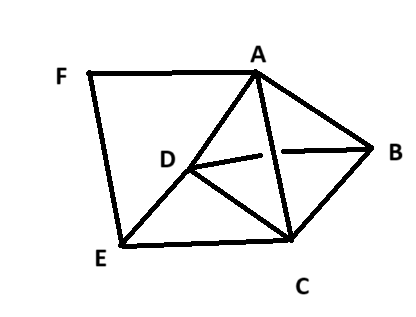

Let $\Psi $ is traingle that is 3 - Clique

$\{ (A,B,C), \ (A,D,C), \ (A,D,B), \ (D,B,C), \ (E,D,C)\}$

1. clique -degrees 
 
    $d (A, \Psi ) = 3 $

    $d (B, \Psi ) = 3 $

    $d (C, \Psi ) = 4 $

    $d (D, \Psi ) = 4 $

    $d (E, \Psi ) = 1 $

    $d (F, \Psi ) = 0 $

2. Sort

| F | E | A | B | C | D |
|---|---|---|---|---|---|
| 0 | 1 | 3 | 3 | 4 | 4 |

iter 1: 

3. core $(F) = 0$, remove $F$
4. no $\Psi$ contains $F$
5. Resort 
    
| E | A | B | C | D |
|---|---|---|---|---|
| 1 | 3 | 3 | 4 | 4 |

iter 2:

6. core $ (E) = 1$, remove $E$
7. $\Psi$ containing $E$ is $\{ (E,D,C) \}$
8. degree of $C$ and $D$ is > degree of E

    $d (C, \Psi ) = 4-1 = 3$

    $d (D, \Psi ) = 4-1 = 3$
9. resort 

| A | B | C | D |
|---|---|---|---|
| 3 | 3 | 3 | 3 |

iter 3:

10. Core $(A) = 3$, remove 3. 
11. $\Psi$ containing $A$ is $\{ (A,B,C), \ (A,D,C),\ (A,D,B), \}$
12. no verticies have degree > degree of $A$
13. resort 

| B | C | D |
|---|---|---|
| 3 | 3 | 3 |

14. do same to get the core values of $B,C,D$

|Vertex | A | B | C | D | E | F |
|----|---|---|---|---|---|---|
|Core | 3 | 3 | 3 | 3 | 1 | 0 |
    




# Core Exact Proposed by Paper 

## Tighter Bounds 

1. instead of $l=0$ set 

    $$
     \hspace{-20cm} {l  =  \frac{k_{max}}{|V_{\Psi}|}}
    $$


2. instead of $u = max(d(v,\Psi)) $ set 

    $$
     \hspace{-20cm} {u  =  k_{max}}
    $$

# Proofs
Lemma 1 and 2 are proof of time complexity 
## Lemma 3

If Given a graph $G(V,E), and CDS $D$, all connected components of CDS D have the same clique density. 

**Proof by contradiction**: lets say we have two connected components $D_{1},D_{2}$ of CDS which don't have the same densities $\rho_{D_{1}},\rho_{D_{2}}$. 

$$\rho_{D_{1}} = \frac{\mu(D_{1},\psi)}{|V_{D_{1}|}}, \rho_{D_{2}} = \frac{\mu(D_{2},\psi)}{|V_{D_{2}}|}$$

Overall density of the CDS 
$$\rho_{D} = \frac{\mu(D_{1},\psi)+ \mu(D_{2},\psi)}{|V_{D_{1}}|+|V_{D_{2}}|}$$

since $\rho_{D_{1}},\rho_{D_{2}}$ aren't equal we can conclude

$$\text{min}\{\rho_{D_{1}},\rho_{D_{2}}\} \leq \rho_{D} \leq \text{max}\{\rho_{D_{1}},\rho_{D_{2}}\}$$

which suggests that we can find a more dense subgraph than CDS, which contradicts our assumptions. so lemma 3 is true.

## Lemma 4 
If Given a graph $G(V,E)$, h-clique $\psi(V_{\psi},E_{\psi})$, CDS $D(V_{D},E_{D})$ and  a subset $U of V_{D}$., removing $U$ from $V_{D}$ will result in decrease of at least $\rho_{\text{opt}}  \times |U|$ clique instances. 

**Proof by contradiction** 
if $\rho_{\text{opt}} \times |U|$ is removed, then 
$$\mu(D\setminus U, \psi) = \rho_{\text{opt}} \times |V_{D}| - \rho_{\text{opt}} \times |U|$$

Lets assume that only $\leq \rho_{\text{opt}} \times |U|$ is removed then 

$$\rho(D\setminus U, \psi) = \frac{\mu(D\setminus U, \psi)}{|V_{D}|-|U|} > \frac{\rho_{\text{opt}} \times |V_{D}| - \rho_{\text{opt}} \times |U|}{|V_{D}|-|U|}$$


$$\rho(D\setminus U, \psi) > \rho_{\text{opt}}$$

which is not posible, we the assumpution is false making the lemma 4 true.

## Lemma 5

The upper bound of $\rho_{\text{opt}}$ is $k_{\text{max}}$. 

$$ \rho_{\text{opt}} \leq k_{\text{max}}$$

**Proof by contradicion**: 
lets assume $$ \rho_{\text{opt}} > k_{\text{max}}$$, if we remove one vertex from $D$, then as per lemma 4 atleast $\rho_\text{opt}$ clique instances will be removed, which is more than $k_{\text{max}}$. 

That means, one vertex vetrex participates in $> k_{\text{max}}$ clique instances. 
which contradicts that the max core values is $k_{\text{max}}$. 

that means Lemma 5 is true.

## Flow Network

Instead of using the full graph to create the flow network let prun the graph and then create the flow network 

Use $(k, \Psi)$ - Core to create Flow network, $k = \lceil l \rceil$

1. Pruning Rule 1 

    Use $(k^{'}, \Psi)$ - Core to create Flow network, $k = \lceil p \rceil$,where p is the max clique density of all residual graphs.

2. Pruning Rule 2 

    It is possible that the $(k^{'}, \Psi)$ - Core has multiple connected components, compute h-clique density $p^{'}$ of each component. 

    if $\lceil max(p^{'}) \rceil > k^{'} $ use new core $k^{''} = \lceil max(p^{'}) \rceil$. That is used $(k^{''}, \Psi )$ to generate flow netwrok 

3. Stoping Condition 

    instead of $u-l = \frac{1}{n(n-1)}$ we use 
    $$
     \hspace{-20cm} {u-l  = \frac{1}{|V_c|(|V_c|-1)}}
    $$
    where $V_c$ is the component used to create flow network

## The above two helps reduce the time 

The flow network progressively shrinks during the binary search as the lower bound \( l \) increases. 

This allows the CDS to be located in cores with higher clique-core numbers. 

As the clique-core numbers rise, the cores shrink, resulting in smaller flow networks and significantly reducing the cost of computing the minimum st-cut.

**Note: The rest of the algorith remains the same as that of exact algorithm**

# TDS Paper

### **Reference**  
**C. Tsourakakis. "The k-clique densest subgraph problem." In *WWW*, pages 1122–1132, 2015.**

Consider an undirected graph $ G(V, E) $, where:  
- $ t $: Total number of 3-cliques (triangles).  
- $ n $: Total number of vertices.

## **1. Lower and Upper Bounds for the Guess**
    
**Lower Bound**
The lower bound for the density of a subgraph $ H $ of $ G $ is:  

$$ l = \frac{t}{n} $$

This is intuitive because it represents the minimum possible density a subgraph $ H $ can have.

**Upper Bound**
For the upper bound, assume the graph is fully connected (complete graph), as this configuration maximizes density.  
The total number of triangles in a complete graph with $ n $ vertices is given by:  $ \binom{n}{3} $

Thus, the upper bound for the density is: 


$$ u  = \frac{\binom{n}{3}}{n} $$
$$ u  = \frac{(n-1)(n-2)}{6}$$


### Note from Dr. Guo, proof that our new proposed upper bound is lower than TDS paper


#### K = 3
Instead of considering the fully connected graph from the upper bound directly, we already know the maximum number of triangles in any subgraph of $G$ is $t$. Therefore, we should focus on the densest subgraph that can contain exactly $t$ triangles. Let this subgraph have $x$ vertices.

We then have the following inequality:

$$
 \binom{x}{3} = t
$$

$$
\frac{x(x-1)(x-2)}{6}  = t
$$

Since $x > 0$, we know that:

$$
 \frac{(x)^3}{6}  >  \frac{x(x-1)(x-2)}{6}  = t
$$

Thus, solving for:

$$
 \frac{(x)^3}{6} > t
$$

yields:

$$
x > \lceil (6t)^{1/3} \rceil
$$

This means atleast $\lceil (6t)^{1/3} \rceil$ verticies can create the subgraph with $t$ cliques.

The upper bound is then:

$$
u = \frac{\binom{x}{3}}{x}
$$

$$
u = \frac{(x-1)(x-2)}{6}
$$

Where:

$$
x = \lceil (6t)^{1/3}\rceil
$$

Since $x \leq n$, we have:

$$
\frac{(x-1)(x-2)}{6} \leq \frac{(n-1)(n-2)}{6}
$$

This provides a tighter upper bound.


#### General K
Instead of considering the fully connected graph from the upper bound directly, we already know the maximum number of $k-$ cliques in any subgraph of $G$ is $t$. Therefore, we should focus on the densest subgraph that can contain exactly $t$ $k-$ cliques. Let this subgraph have $x$ vertices.

We then have the following inequality:

$$
\binom{x}{k} = t
$$

$$
\frac{x!}{k! \times (x-k)!} = t
$$

$$
\frac{x \times (x-1) ...... \times (x-k+1)}{k!} = t
$$

Since $x > 0$, we know that:

$$
\frac{(x)^{k}}{k!} > \frac{x \times (x-1) ...... \times (x-k+1) }{k!} = t
$$

Thus, solving for:

$$
\frac{(x)^k}{k!} > t
$$

yields:

$$
x = \lceil (k! \times t)^{1/k!} \rceil
$$

The upper bound is then:

$$
u = \frac{\binom{x}{k!}}{x}
$$

$$
u = \frac{(x-1)(x-2)...(x-k+1)}{k!}
$$

Where:

$$
x = \lceil (k! \times t)^{1/k!} \rceil
$$

Upper bound proposed by TDS paper 

$$
u = \frac{\binom{n}{k}}{n}
$$

$$
u = \frac{(n-1)(n-2)....(n-k+1)}{k!}
$$
Since $x \leq n$, we have:

$$
\frac{(x-1)(x-2)...(x-k+1)}{k!} \leq \frac{(n-1)(n-2)....(n-k+1)}{k!}
$$

This provides a tighter upper bound.


### Check whether our upper bound is tighter than the upper bound propossed by DSD paper 


let us assume that we have a graph or size $n$. Let there is $t$ $k-$ cliques in the graph. 

Then minimum  number of verticies that can form $t$ cliques is 

#### For  k = 3

$$ x = \lceil (6t)^{1/3}\rceil $$  

then upper bound $u$. 

$$ u = \frac{t}{x} $$
$$ u = \frac{t^{2/3}}{6^{1/3}}$$

Let us say the max 3-clique core value we have is $\gamma$, then DSD propossed the upper bound is 

$$u = \gamma$$

As we have $t$ 3-cliques, then max 3-clique core value will be 

$$ 1 \leq \gamma \leq t$$

as at max a vertex can be participating in all 3-cliques, making the max 3- clique core value $t$,

it is also posiible that verticies  are participaing in only one 3-clique, make the max 3-clique core value $1$. 

1. Case 1 : $\gamma = t$

    clearly 
    
    $$t > \frac{t^{2/3}}{6^{1/3}}$$ 
    
    for all $t >1$. 

    our bound is tighter 

2. case 2 : $\gamma = 1$

    $$ 1 < \frac{t^{2/3}}{6^{1/3}} $$

    for all $t > 2$.

    DSD paper bound will be tighter. 

**Note** Case 1 and Case 2 are not representative of real-world graphs; the majority of graphs will follow Case 3.

3. case 3: $ 1 < \gamma < t$

    As $\gamma$ can be anything between 1 and t, depending on the value of $\gamma$ and value of $t$, we ca only determine which bound is tighter. 

    so we need to use **empirical evidence**

    Before checking the real world graph, let us that $\gamma =  f(t)$, such that $f(t) < t$. 

    1. let $f(t) = \frac{t}{100}$

        $$ \gamma > \frac{t^{2/3}}{6^{1/3}} $$ 

        for $t > 166666$

    2. let $f(t) = \frac{t}{1000}$

        $$ \gamma > \frac{t^{2/3}}{6^{1/3}} $$ 

        for $t > 166666$



#### For General k

$$ x = \lceil (k!t)^{(1)/k}\rceil $$  

then upper bound $u$. 

$$ u = \frac{t}{x} $$
$$ u = \frac{t^{(k-1)/k}}{(k!)^{1/k}}$$

Let us say the max k-clique core value we have is $\gamma$, then DSD propossed the upper bound is 

$$u = \gamma$$

As we have $t$ k-cliques, then max k-clique core value will be 

$$ 1 \leq \gamma \leq t$$

as at max a vertex can be participating in all k-cliques, making the max k- clique core value $t$,

it is also posiible that verticies  are participaing in only one k-clique, make the max k-clique core value $1$. 

1. Case 1 : $\gamma = t$

    clearly
    $$t > \frac{t^{(k-1)/k}}{(k!)^{1/k}}$$ 
    for all $t >1$, and $k>2$
    our bound is tighter 

2. case 2 : $\gamma = 1$

    $$ 1 < \frac{t^{(k-1)/k}}{(k!)^{1/k}} $$

    for $ k  = 3,4 $, for  all $t > 2$.

    for $ k  = 5, 6 $, for  all $t > 3$.

    for $ k  = 7, 8 $, for  all $t > 4$.

    and so one, 

    DSD paper bound will be tighter. 

**Note** Case 1 and Case 2 are not representative of real-world graphs; the majority of graphs will follow Case 3.

3. case 3: $ 1 < \gamma < t$

    As $\gamma$ can be anything between 1 and t, depending on the value of $\gamma$ and value of $t$, we can determine which bound is tighter. 

    so we need to use **empirical evidence**


#### Note

**All the above calculations assume that the graph consists of a single connected component. However, if the graph has multiple connected components, the maximum core  $k-$ clique, denoted as $\gamma$ , still satisfies  $ 1 \leq \gamma \leq t$ and remains unchanged. This means that  the upper bound proposed by DSD remains unchanged and doesn't change if we consider the whole graph or just a connected component**

**But for our upper bound calculation we will only consider the $k-$ cliques in that connected component denoted by $t^{'}$. So our upper bound will be**
$$\frac{(t^{'})^{(k-1)/k}}{(k!)^{1/k}}$$

**As $t^{'}$ will be significantly smaller than $t$,  our refined upper bound has the potential to be tighter than the one given by DSD.**
**Need empirical evidence**


From DSD paper we can see that the number of connected components is large in most of the graphs, since these connected components contains only those edges that are part of atleast one clique. That means each components will have cliques $\geq 1$. 

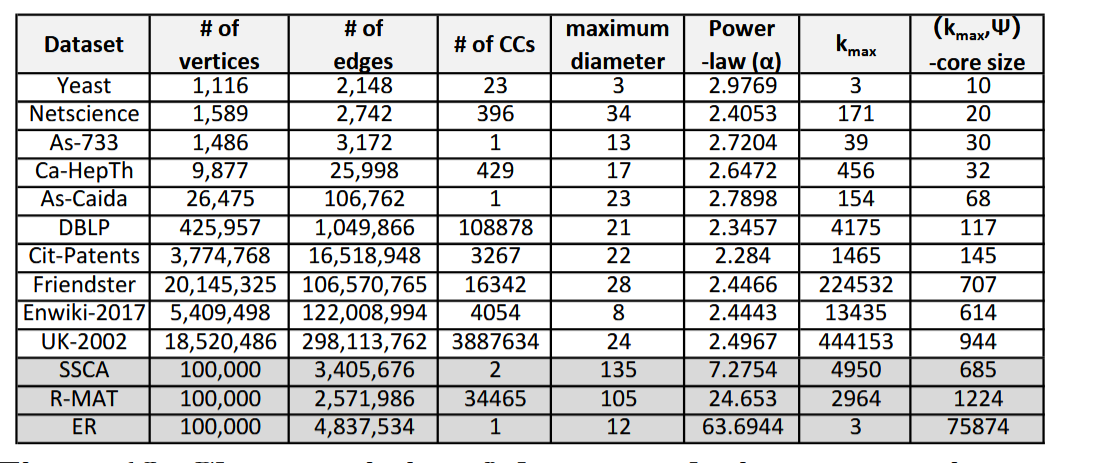

So that clearly, implies $t^{'} <<< t$, which means our upper bound has the potential to be significantly tighter that the one proposed by DSD. 

Example

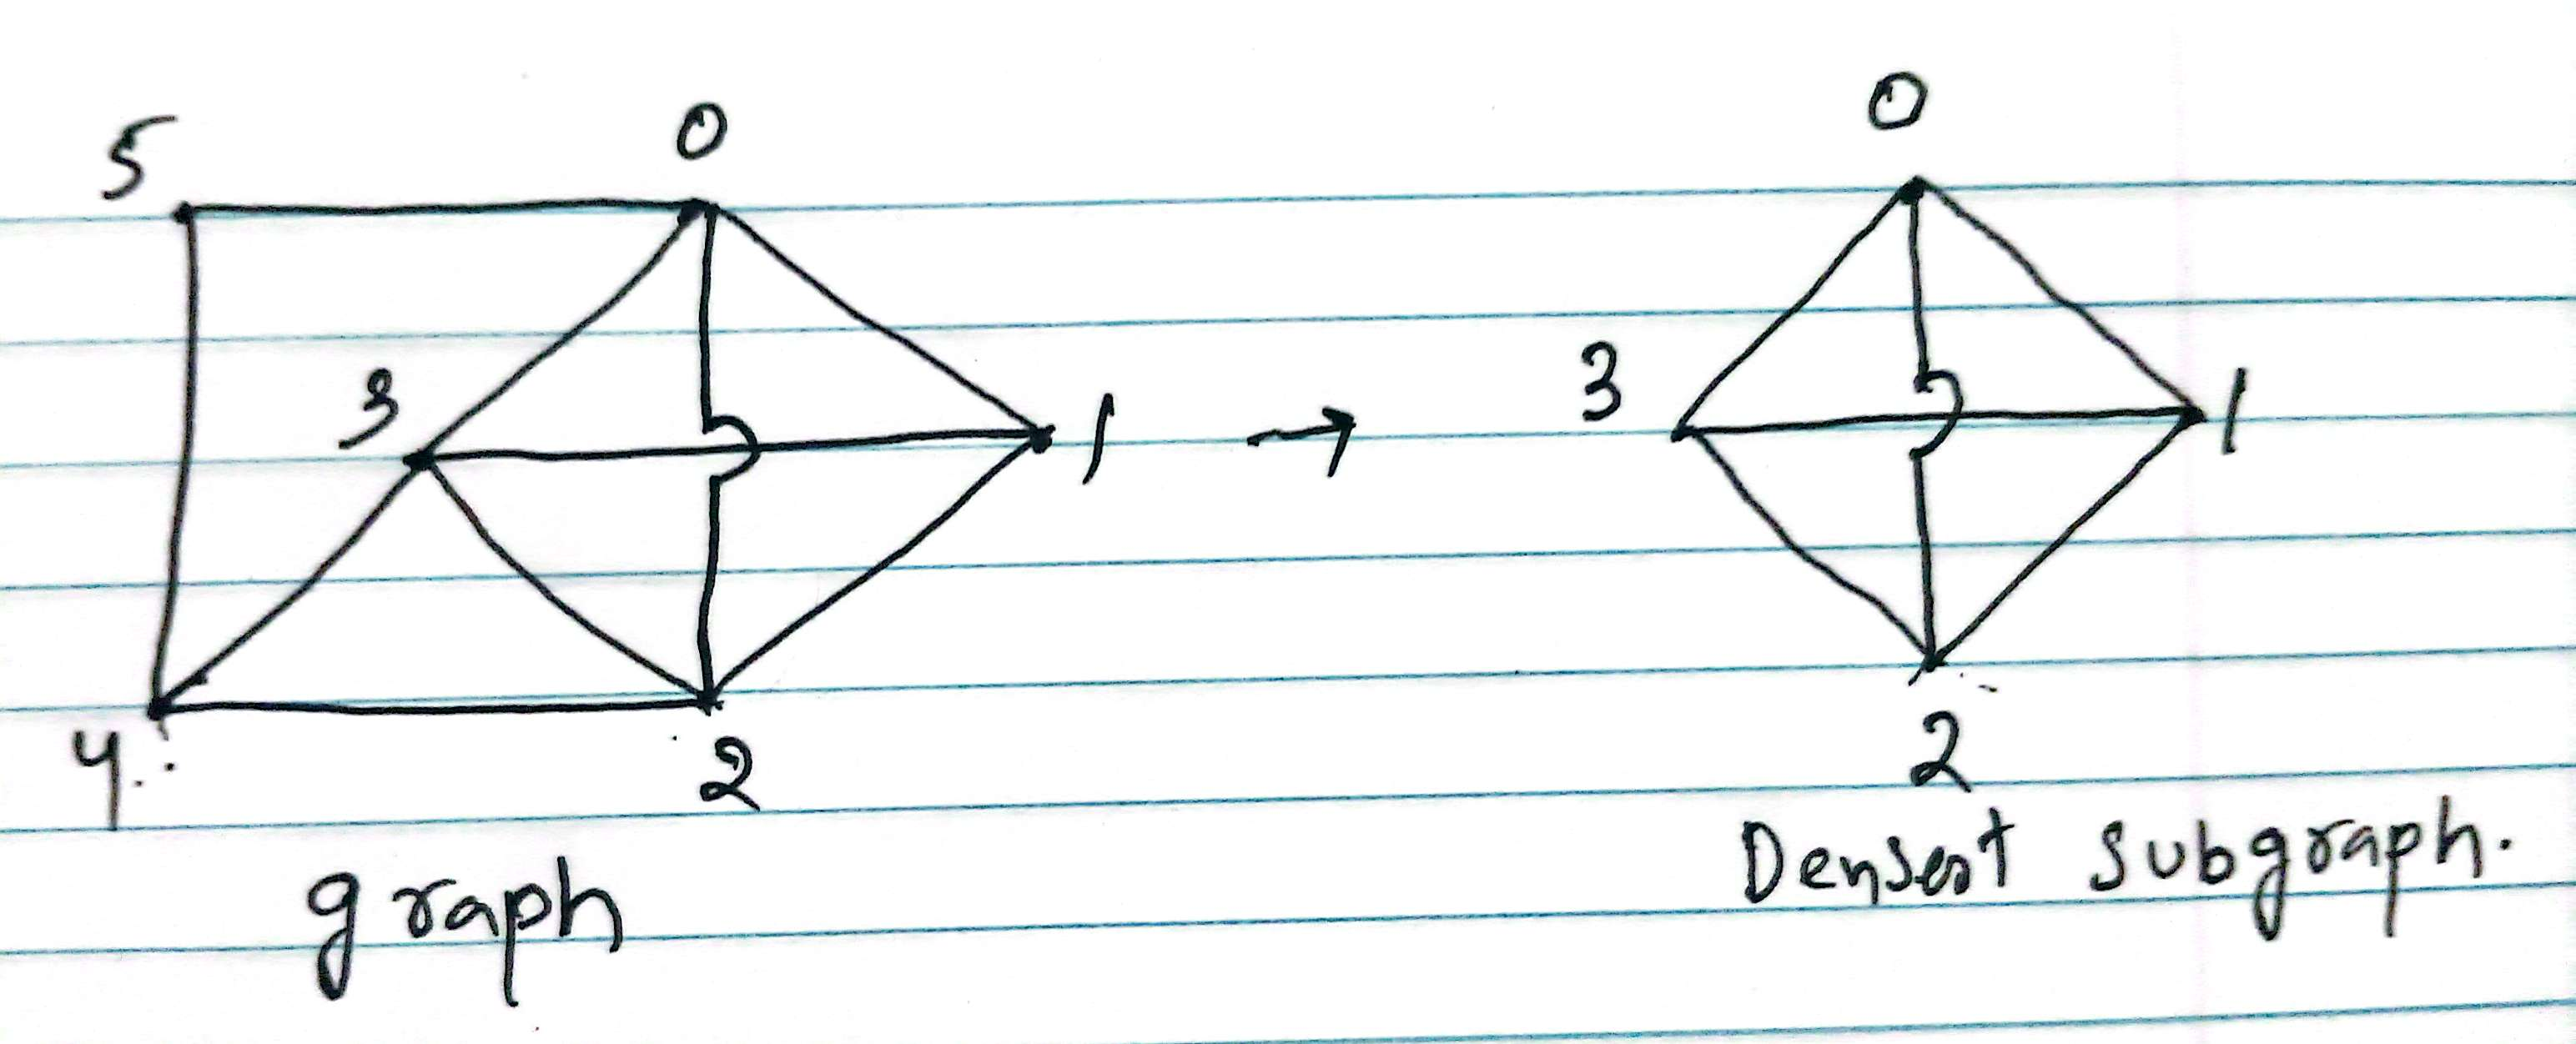

**3-clique density of CDS**

$$p = \frac{4}{4} = 1$$

**Upper Bound TSD**

$$u = \lceil \frac{(n-1)(n-2)}{6} \rceil = 4$$

**Upper Bound DSD**

$$u = k_{max} = 3$$

**Upper Bound Ours**

we have $t$ = 5

$$ u = \lceil \frac{t^{2/3}}{6^{1/3}}\rceil = 2$$


## 2. Stopping Condition

Let $ S_1 $ and $ S_2 $ be two distinct subgraphs with $ t_1 $ and $ t_2 $ triangles, respectively. Let $ |\lambda| $ denote the smallest possible difference between their densities. The density difference is given by:

$$
|\lambda| = \left| \frac{t_1}{|S_1|} - \frac{t_2}{|S_2|} \right|
$$

**Case 1:** $ |S_1| = |S_2| = x $

In this case, the subgraphs have the same size. The density difference simplifies as follows:

$$
|\lambda| = \left| \frac{t_1}{x} - \frac{t_2}{x} \right| = \frac{|t_1 - t_2|}{x}
$$

Since $ t_1 $ and $ t_2 $ are natural numbers, the minimum possible absolute difference is 1. Therefore:

$$
|\lambda| = \frac{1}{x}
$$

Given that $ x \leq n $, where $ n $ is the total size of the graph, it follows that:

$$
\frac{1}{n(n-1)} \leq \frac{1}{n} \leq \frac{1}{x}
$$

Thus, in this case:

$$
|\lambda| \geq \frac{1}{n(n-1)}
$$


**Case 2:** $ |S_1| \neq |S_2| $

Now consider the case where $ |S_1| > |S_2| $. Let $ |S_1| = x $ and $ |S_2| = x - y $, where $ y \in \mathbb{N} $ and $ y \geq 1 $. The density difference becomes:

$$
|\lambda| = \left| \frac{t_1}{x} - \frac{t_2}{x-y} \right|
$$

Rewriting, we get:

$$
|\lambda| = \left| \frac{(x-y)t_1 - xt_2}{x(x-y)} \right|
$$

Since $ (x-y)t_1 $ and $ xt_2 $ are natural numbers, the minimum possible absolute difference in the numerator is 1. Therefore:

$$
|\lambda| = \frac{1}{x(x-y)}
$$

As $ y $ increases, the denominator $ x(x-y) $ decreases, and thus $ |\lambda| $ increases. The minimum value of $ |\lambda| $ occurs when $ y = 1 $:

$$
|\lambda| \geq \frac{1}{x(x-1)}
$$

Given that $ x \leq n $, it follows that:

$$
 \frac{1}{x(x-1)} \leq \frac{1}{n(n-1)} 
$$

Thus, in this case:

$$
|\lambda| \geq \frac{1}{n(n-1)}
$$



Combining both cases, we derive a universal stopping condition for the algorithm:

$$
|\lambda| < \frac{1}{n(n-1)}
$$




# Trying Trie Data structure

Normal representation

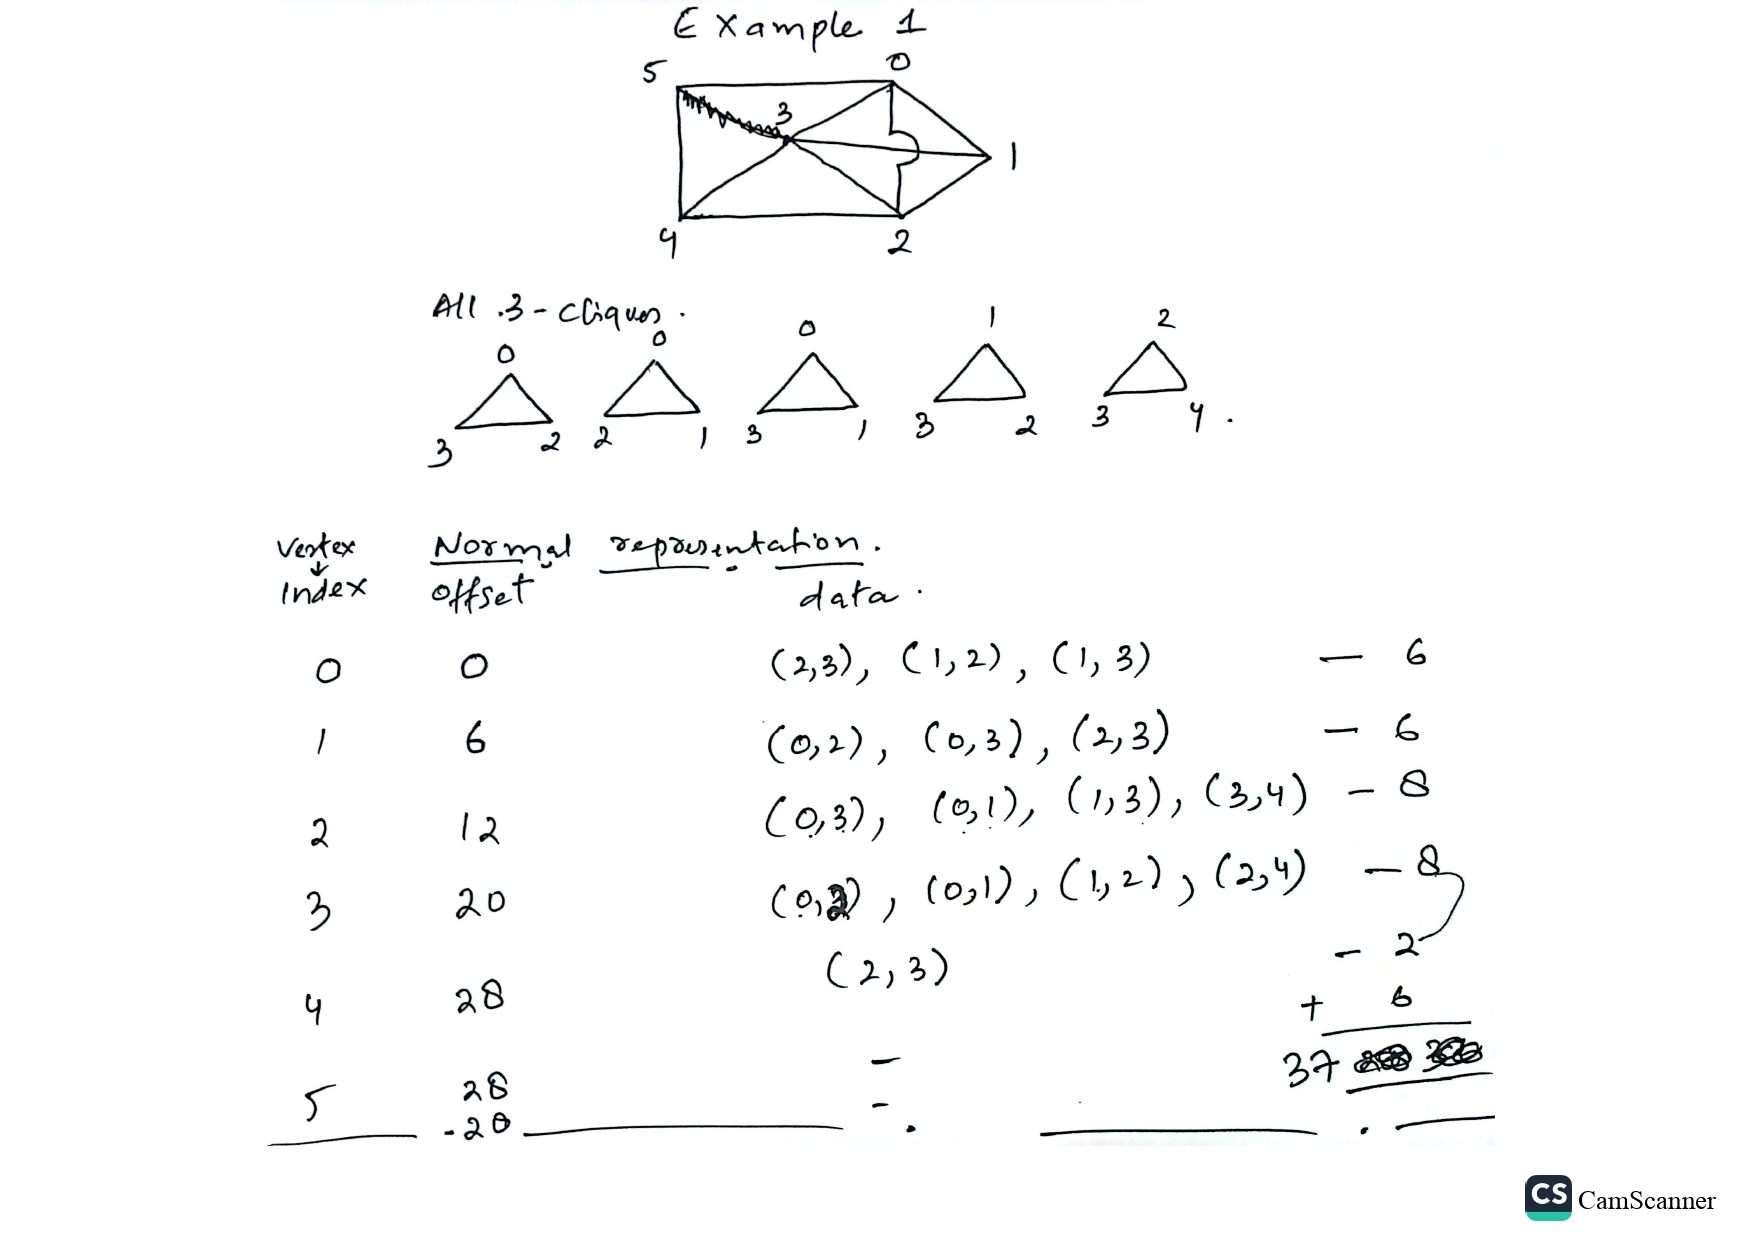


**Space Complexity**

$O(\tau \times k \times (k-1) + n + 1)$, where 
- $\tau$ is the total cliques
- $k$ is the total number of vertices in one clique
- $n$ total number of verticies

**Insert**
1. we need to run the Clique Listing algorithm twice, first to construct the offset by counting the number of cliques for each vertex. 
2. Then to list the actual cliques
3. After running the algorithm twice, then inserting time complexity = $O(d)$, where $d$ is the clique degree of vertex

**Search**: Find all cliques that include a particular vertex $v$. 
1. Get location of the cliques : time complexity $O(1)$, then iter throught the cliques Time complexity $O(d)$. 



Trie Rrepresentation

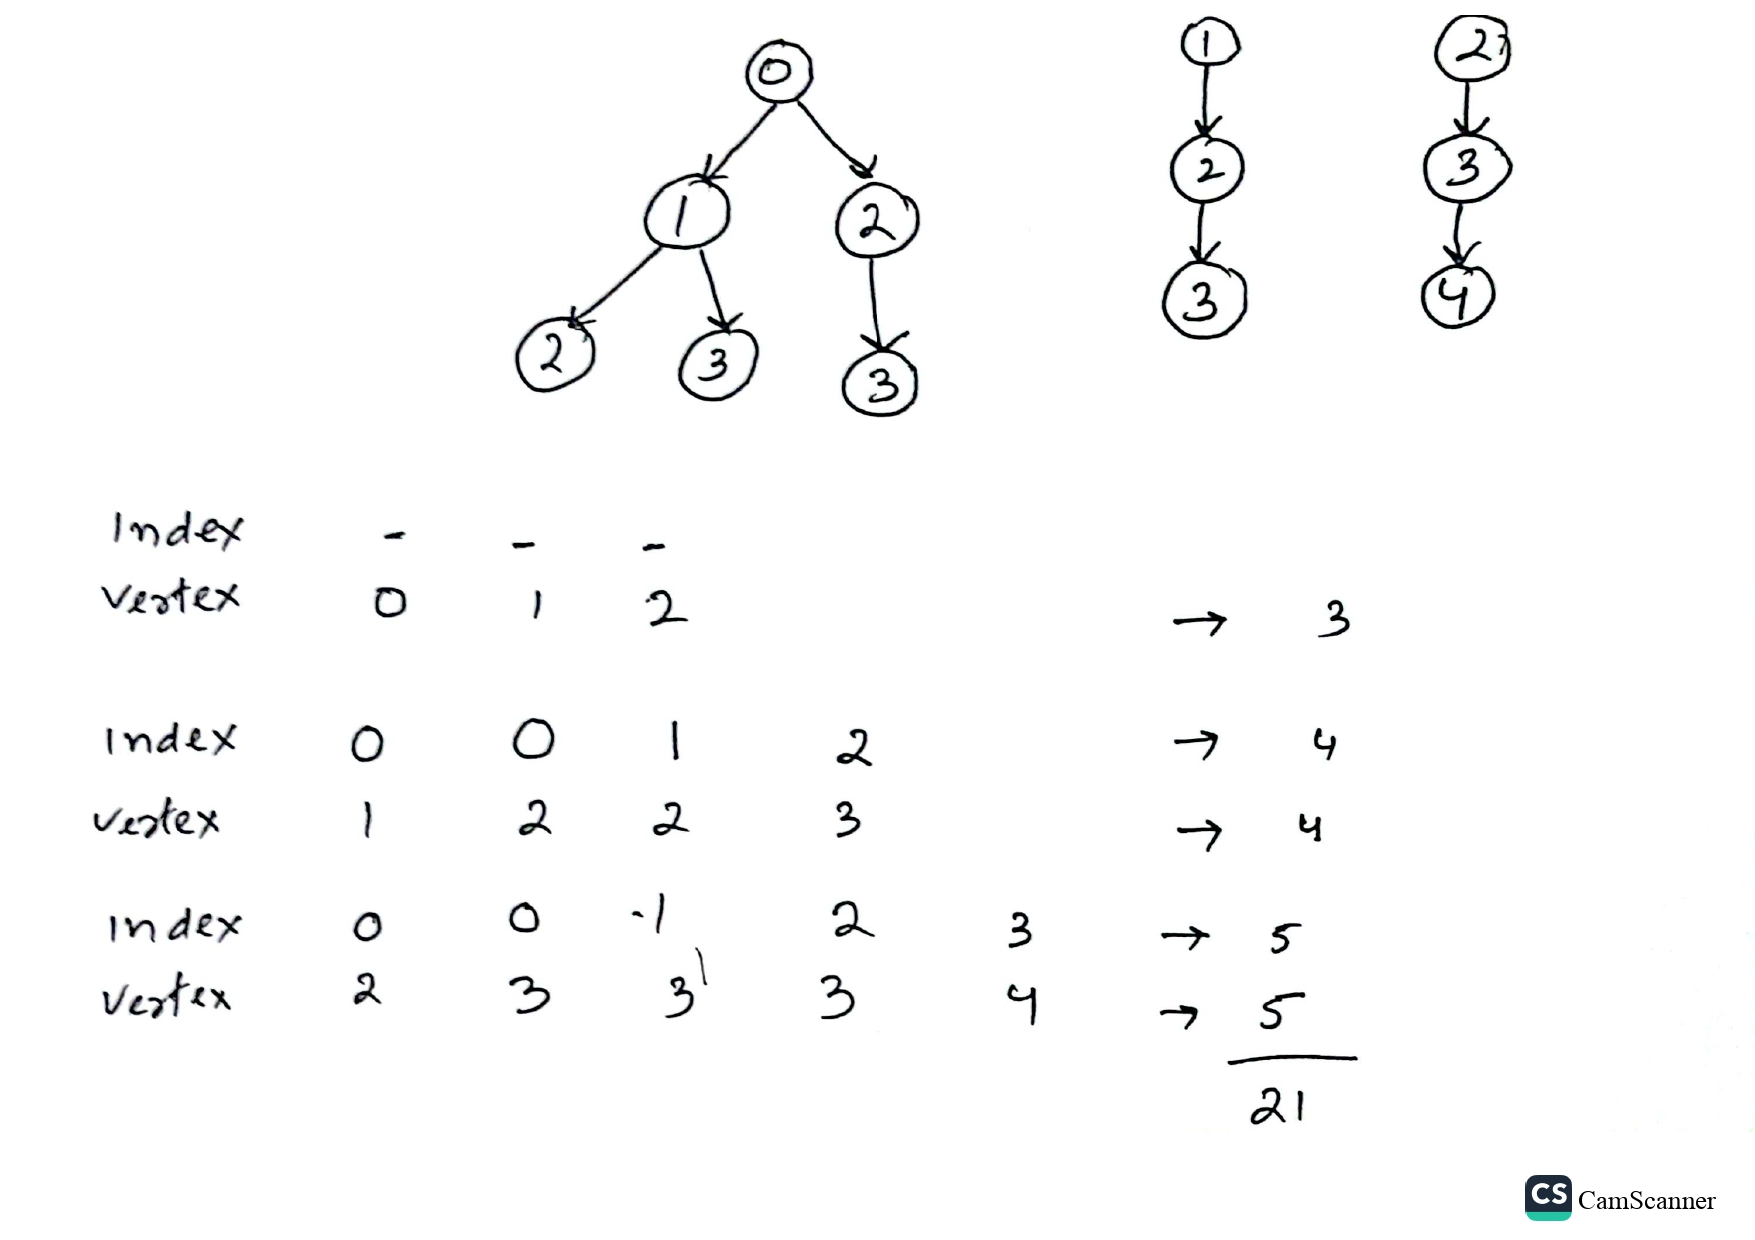

**Space complexity**

At best = $O(\tau \times k)$

At worst = $O(\tau \times k \times (k-1))$

**Search**: Find all the cliques that include a vertex $v$
1. We need to search in level 1, level 2 and level 3. As a clique can be stored as 1 -> 2 -> 3. and our vertex can be 2. so we cannot just search the root node. 
2. Serach Level 3 $O(L3)$
    1. if found, $O(1)$ to get its parents, and the whole clique. 
3. Search Level 2 $O(L2)$
    1. search index in level 3 $O(L3)$
    2. Get parent in level 1 $O(1)$
4. Search Level 1- $O(L1)$
    1. if found search index in Level 2. $O(L2)$
        1. if found search index in level 1 $O(L1)$

Worst complexity: $O(L1 \times L2 \times L1 + L2 \times L3 + L3)$

# Modified Trie Data Structure

**We found the cliques using our listing algorithm in this order**

S.no| Clique  | Motif degree
----|---------|------
1   | 2, 0, 1 | 1, 1, 1, 0, 0, 0
2   | 2, 0, 3 | 2, 1, 2, 1, 0, 0
3   | 2, 3, 1 | 2, 2, 3, 2, 0, 0
4   | 2, 3, 4 | 2, 2, 4, 3, 1, 0
5   | 3, 0, 1 | 3, 3, 4, 4, 1, 0


**Lets try to bluid our motified Trie data structure. The conditions to follow**

1. Total K levels $(L_1,L_2,...L_k)$
2. One array indicating which clliques was removed and which are not removed. 
3. Parent in $L_1$, then its childern in $L_2$, then childern of $L_2$ in $L_3$ and so on.  
4. Parent should have a higer degree than its child
5. If parent and child have same degree, make the biger vertex the parent

Lets start building our data structure for our exmample. Here $k=3$, so we need to have 3 levels.. 

1. Found clique $(2, 0, 1)$, motiff degre at this stage $[1, 1, 1, 0, 0, 0]$

Level 1 | 2 
--------|---
Level 2 | 1
Level 3 | 0
status  | 1

Serial Time : $O(k)$

Serial time: $O(0 \times k)$ - check and swap

2. Found clique $(2, 0, 3)$. motiff degree at this stage $[2, 1, 2, 1, 0, 0]$

Level 1 | 2 | 3
--------|---|---
Level 2 | 1 | 2
Level 3 | 0 | 0
status  | 1 | 1

- Need to check previous clique $(2, 1, 0) $, motif degree is $(2, 1, 2)$, need to swap $(1,0)$

Level 1 | 2 | 3
--------|---|---
Level 2 | 0 | 2
Level 3 | 1 | 0
status  | 1 | 1


Serial Time : $O(k)$ - inserting 
Serial time: $O(1 \times k)$ - check and swap

3. Found clique $(2, 3, 1)$. motiff degree at this stage $[2, 2, 3, 2, 0, 0]$

Level 1 | 2 | 3 | 2 |
--------|---|---|---|
Level 2 | 0 | 2 | 3 |
Level 3 | 1 | 0 | 1 |
status  | 1 | 1 | 1 |

- Need to check previous clique $(2, 0, 1) $, motif degree is $(3, 2, 1)$, need to swap $(0,1)$
- Need to check previous clique $(3, 2, 0) $, motif degree is $(2, 3, 2)$, need to swap $(3,2)$

Level 1 | 2 | 2 | 2 |
--------|---|---|---|
Level 2 | 1 | 3 | 3 |
Level 3 | 0 | 0 | 1 |
status  | 1 | 1 | 1 |


Serial Time : $O(k)$ - inserting 

Serial time: $O(2 \times k)$ - check and swap

4. Found clique $(2, 3, 4)$. motiff degree at this stage $[2, 2, 4, 3, 1, 0]$

Level 1 | 2 | 2 | 2 | 2
--------|---|---|---|---
Level 2 | 1 | 3 | 3 | 3
Level 3 | 0 | 0 | 1 | 4
status  | 1 | 1 | 1 | 1

- Need to check previous clique $(2, 1, 0) $, motif degree is $(4, 2, 2)$, no need for swap
- Need to check previous clique $(2, 3, 0) $, motif degree is $(4, 3, 2)$, no need for swap
- Need to check previous clique $(2, 3, 1) $, motif degree is $(4, 3, 2)$, no need for swap

Serial Time : $O(k)$ - inserting 

Serial time: $O(3 \times k)$ - check and swap

5. Found clique $(3, 0, 1)$. motiff degree at this stage $[3, 3, 4, 4, 1, 0]$

Level 1 | 2 | 2 | 2 | 2 | 3
--------|---|---|---|---|---
Level 2 | 1 | 3 | 3 | 3 | 1
Level 3 | 0 | 0 | 1 | 4 | 0
status  | 1 | 1 | 1 | 1 | 1

- Need to check previous clique $(2, 1, 0) $, motif degree is $(4, 3, 3)$, no need for swap
- Need to check previous clique $(2, 3, 0) $, motif degree is $(4, 4, 3)$, swap $(3,2)$
- Need to check previous clique $(2, 3, 1) $, motif degree is $(4, 4, 3)$, swap $(3,2)$
- Need to check previous clique $(2, 3, 4) $, motif degree is $(4, 4, 1)$, swap $(3,2)$

Level 1 | 2 | 3 | 3 | 3 | 3
--------|---|---|---|---|---
Level 2 | 1 | 2 | 2 | 2 | 1
Level 3 | 0 | 0 | 1 | 4 | 0
status  | 1 | 1 | 1 | 1 | 1

Serial Time : $O(k)$ - inserting 

Serial time: $O(4 \times k)$ - check and swap


Total isertion time = $t \times k$
Total update time = $O(0 \times k + 1 \times k + 2 \times k + ...+ (t-1) \times k) = O(k \times t(t+1)/2) = O(t^{2} \times k)$


Total time to construct Data Structure = $O(t^{2} \times k + k)$

Space Complexity = $O(t \times (k+1))$

**Search all cliques  which include a vertex $v$.

Since we need this during our peeling algorithm. The order in which we need it for verticies will be 

vertex| 5 | 4 | 0 | 1 | 2 | 3
------|---|---|---|---|---|---
degree| 0 | 1 | 3 | 3 | 4 | 4

1. Remove vertex 5 

    - As motif degree is zero, No need to find cliques 

2. Remove vertex 4
    - Search 4 in $L_3$, found at index 3, get parent of 4 in $L_2$ i.e 2 and finnaly get parent of 2 in $L_1$ i.e 3. Clique is $(3, 2, 4)$. Update status to 0
    - Need to check and update the rest as motif degree is updated.     

vertex| 5 | 4 | 0 | 1 | 2 | 3
------|---|---|---|---|---|---
degree| 0 | 0 | 3 | 3 | 3 | 3

    - clique $(2,1,0)$, motif degree $(3,3,3)$, no swap needed
    - clique $(3,2,0)$, motif degree $(3,3,3)$, no swap needed
    - clique $(3,2,1)$, motif degree $(3,3,3)$, no swap needed
    - clique $(3,1,0)$, motif degree $(3,3,3)$, no swap needed

Level 1 | 2 | 3 | 3 | 3 | 3
--------|---|---|---|---|---
Level 2 | 1 | 2 | 2 | 2 | 1
Level 3 | 0 | 0 | 1 | 4 | 0
status  | 1 | 1 | 1 | 0 | 1

Serial Time = $O(t + d_{4} \times k )$ - searching 

Serial Time = $O((t - d_{4}) \times k)$

3. Remove vertex 0
    - Search 0 in $L_3$, found at index 0, 1, 4, get parents of 0,0,0 in $L_2$ i.e 1, 2, 1 and finnaly get parents of 1, 2, 1 in $L_1$ i.e 2, 3, 3. Cliques are $(2,1,0), (3,2,0), (3,1,0)$. Update status to 0
    - Need to check and update the rest as motif degree is updated.     

vertex| 5 | 4 | 0 | 1 | 2 | 3
------|---|---|---|---|---|---
degree| 0 | 0 | 0 | 1 | 1 | 1

    - clique $(3,2,1)$, motif degree $(1,1,1)$, no swap needed


Level 1 | 2 | 3 | 3 | 3 | 3
--------|---|---|---|---|---
Level 2 | 1 | 2 | 2 | 2 | 1
Level 3 | 0 | 0 | 1 | 4 | 0
status  | 0 | 0 | 1 | 0 | 0

Serial Time = $O(t + d_{0} \times k )$ - searching 

Serial Time = $O((t - -d_{4} - d_{0}) \times k)$

3. Remove vertex 1
    - Search 1 in $L_3$, found at index 2, get parent of 1 in $L_2$ i.e 2 and finnaly get parent of 2 in $L_1$ 3. Clique is $(3,2,1)$. Update status to 0
    - Need to check and update the rest as motif degree is updated.     


vertex| 5 | 4 | 0 | 1 | 2 | 3
------|---|---|---|---|---|---
degree| 0 | 0 | 0 | 0 | 0 | 0

.

Level 1 | 2 | 3 | 3 | 3 | 3
--------|---|---|---|---|---
Level 2 | 1 | 2 | 2 | 2 | 1
Level 3 | 0 | 0 | 1 | 4 | 0
status  | 0 | 0 | 0 | 0 | 0

Serial Time = $O(t + d_{1} \times k )$ - searching 

Serial Time = $O((t - -d_{4} - d_{0} - d_{1}) \times k)$


Total Search time for a vertex $v_i  = O(t+ d_{v_i} \times k)$

Total Update time for vertex $v_i  = O( (t- \Sigma_{j=0}^{j=i} d_{v_{j}})) \times k$

On worst average update time is gonna be = $\frac{k \times t^{2}}{n}$

**Note: All of the updated can be parallized making the whole process much more efficient**
